## Sign Language Letters detection using HOG Features 
Detection of American Sign Language Letters by analyzing sign language MNIST image dataset. Pixel level features will be used in each image as well as HOG (Histogram of Oriented Gradients) Features, to be followed with feature selection to improve the performance. Finally different evaluation metrics will be printed for the classifier model such as Accuracy, F1 Score, Precision, Recall and plot ROC curves for all the classes.

In [21]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.feature import hog
from skimage import data,exposure
import cv2
%matplotlib inline
np.random.seed(1)


In [22]:

df_train = pd.read_csv("archive/sign_mnist_train.csv")
df_test = pd.read_csv("archive/sign_mnist_test.csv")


In [23]:
''' Separating features and labels from the dataframes into numpy arrays'''

train_x = (df_train.drop('label', axis=1).copy()).values
train_y = df_train['label'].values


test_x = (df_test.drop('label', axis=1).copy()).values
test_y = df_test['label'].values               

print("SUMMARY OF DATA:")

print("train_x shape: " + str(train_x.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x shape: " + str(test_x.shape))
print("test_y shape: " + str(test_y.shape))


SUMMARY OF DATA:
train_x shape: (27455, 784)
train_y shape: (27455,)
test_x shape: (7172, 784)
test_y shape: (7172,)


In [24]:
''' Normalizing the pixel values to be between 0 and 1'''

train_x = train_x/255
test_x = test_x/255


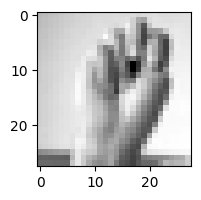

Label: 13


In [25]:
'''Example of an image from the dataset'''

index = 4
plt.figure(figsize=(2,2))
plt.imshow(train_x[index].reshape(28, 28),cmap='gray')
plt.show()
print("Label: " + str(train_y[index]))

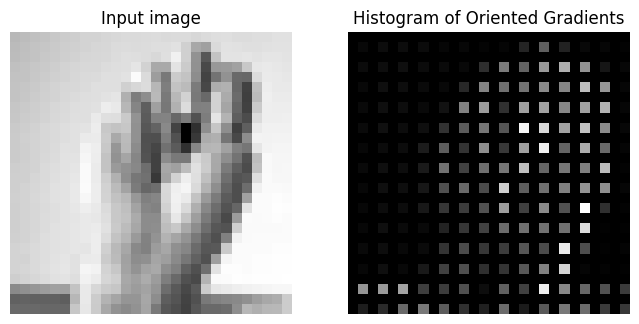

In [26]:
# Function to compute HOG features and HOG image for a given image
# Input: image (1D array of 784 pixels)
# Output: fd (HOG feature descriptor), hog_image (visualization of HOG features)
# Reshape the image to 28x28 before computing HOG features

def get_hog(image):
    fd,hog_image=hog(image.reshape(28,28),pixels_per_cell=(2,2),
                        cells_per_block=(1, 1),visualize=True,feature_vector=False)
    return(fd,hog_image)



# Function to display the original image and its HOG visualization side by side
# Input: image (1D array of 784 pixels), hog_image (2D array of HOG visualization)
# Displays the original image and the rescaled HOG image using matplotlib

def show_hog(image,hog_image):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    ax1.set_title('Input image')
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()


# Example usage of get_hog and show_hog functions
image = train_x[4]
fd, hog_image = get_hog(image)
show_hog(image, hog_image)


In [28]:

# Compute HOG features for all training images
hog_features_train = []
hog_images_train = []
for i in range(train_x.shape[0]):
    fd,hog_image = get_hog(train_x[i])
    hog_features_train.append(fd)
    hog_images_train.append(hog_image)
hog_features_train = np.array(hog_features_train)
hog_images_train = np.array(hog_images_train)   
print("HOG features shape for training data: " + str(hog_features_train.shape))

HOG features shape for training data: (27455, 14, 14, 1, 1, 9)
